# 1 D CNN on MNIST Dataset



In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import time
from numpy import linalg as LA
import numpy as np
import math

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
trainX = mnist.train.images
trainY = mnist.train.labels
#print(trainY)
testX = mnist.test.images
testY = mnist.test.labels

W0812 23:48:26.203482 139946391799680 deprecation.py:323] From <ipython-input-1-a39626f23f33>:9: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0812 23:48:26.205536 139946391799680 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0812 23:48:26.219227 139946391799680 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz


W0812 23:48:26.699143 139946391799680 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0812 23:48:26.707960 139946391799680 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0812 23:48:26.865715 139946391799680 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be remove

Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
X= tf.placeholder(tf.float32, shape= [None,28, 28,1], name= "Input")
Y= tf.placeholder(tf.float32, [None, 10], name= "Output")
keep_prob = tf.placeholder("float")
#X = tf.reshape(trainX, [None, 28, 28, 1])
he_initializer = tf.contrib.layers.variance_scaling_initializer()

# Convolution Neural Network
I imlement 4 Layer CNN followed by 1 layer Dense Layer.


In [3]:
layer1 = tf.layers.conv2d(
    inputs=X,
    filters=5,
    kernel_size=[1,4],
    padding="same",
    activation=tf.nn.relu, kernel_initializer = he_initializer)
max_pool1 = tf.layers.MaxPooling2D(pool_size = (1, 2), strides = (1,2))(layer1)


W0812 23:48:27.315711 139946391799680 deprecation.py:323] From <ipython-input-3-a07ae32e7b9e>:6: conv2d (from tensorflow.python.layers.convolutional) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.


In [4]:
max_pool1.get_shape()

TensorShape([Dimension(None), Dimension(28), Dimension(14), Dimension(5)])

2nd CNN Layer


In [0]:
layer3 = tf.layers.conv2d(
    inputs=max_pool1,
    filters=16,
    kernel_size=[1,4],
    padding="same",
    activation=tf.nn.relu, kernel_initializer = he_initializer)

max_pool3 = tf.layers.MaxPooling2D(pool_size = (2, 2), strides = (1, 2))(layer3)

3rd CNN Layer

In [0]:
layer4 = tf.layers.conv2d(
    inputs=max_pool3,
    filters=16,
    kernel_size=[1,4],
    padding="same",
    activation=tf.nn.relu, kernel_initializer = he_initializer)

max_pool4 = tf.layers.MaxPooling2D(pool_size = (2, 2), strides = (1, 2))(layer4)

4Th CNN Layer

In [0]:
layer2 = tf.layers.conv2d(
    inputs=max_pool4,
    filters=16,
    kernel_size=[1,4],
    padding="same",
    activation=tf.nn.relu, kernel_initializer = he_initializer)

max_pool2 = tf.layers.MaxPooling2D(pool_size = (2, 2), strides = (1, 2))(layer2)

In [0]:
max_pool2.get_shape()
pool2_flat = tf.reshape(max_pool2, [-1, 25 * 1 * 16])

1 Dense Layer

In [10]:
dense = tf.layers.dense(inputs= pool2_flat, units=512, activation=tf.nn.relu, kernel_initializer = he_initializer)

W0812 23:48:49.855126 139946391799680 deprecation.py:323] From <ipython-input-10-0530c861d532>:1: dense (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.dense instead.


In [11]:
logits = tf.layers.dense(inputs=dense, units=10)
tf.nn.softmax(logits, name="softmax_tensor")
output= tf.reshape(logits, shape = [-1, 10])



W0812 23:48:50.234778 139946391799680 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [12]:
output.get_shape()

TensorShape([Dimension(None), Dimension(10)])

In [0]:
cross_entropy= tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels = Y))
optimizer= tf.train.AdamOptimizer(0.002)
train_step= optimizer.minimize(cross_entropy )

prediction= tf.argmax(output,1)
correct_prediction = tf.equal(tf.argmax(output,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Session Starts Here

Accuracy for complete 1000 Test Set is  98.19999933242798 %


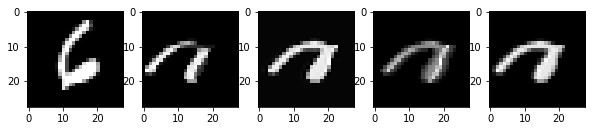

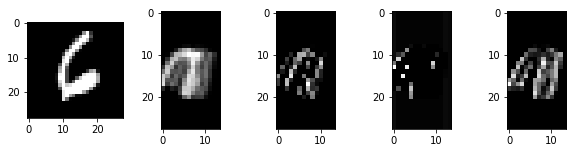

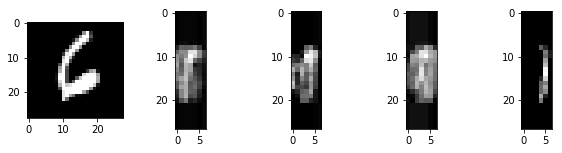

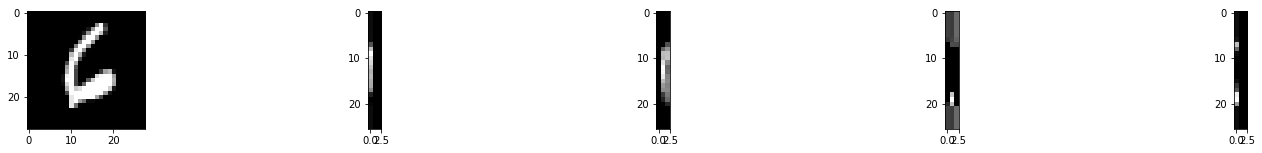

In [14]:
with tf.Session() as sess:
  init = tf.global_variables_initializer()
  sess.run(init)
  batch_size = 20000
  epoch = 100
  iterations = int(trainX.shape[0]/ batch_size)
  #print(iterations)
  for e in range(epoch):
    
    
    
    start = time.time()
    #print(e,"epoch")
    for i in range(iterations):
      
     # print('iteration ',i)
      batch_start= (i * batch_size) % (trainX.shape[0]- batch_size)
      batch_end= batch_start + batch_size
     # print(batch_start, batch_end)
      batch_X = trainX[batch_start:batch_end]
      batch_Y = trainY[batch_start:batch_end]
      
      
       
      batch_X = np.reshape(batch_X, (batch_size, 28, 28, 1))
      batch_Y = np.reshape(batch_Y, (batch_size, 10))

      train_data = {X:batch_X, Y:batch_Y}
      sess.run(train_step, feed_dict = train_data)
      end = time.time()
  
  
 
  n_columns = 4
  n_rows=-1
  for la in [layer1, layer3, layer4, layer2]:
    n_rows+=1
    if n_rows > 2:
      plt.figure(figsize=(10+15,10))
    else:
      plt.figure(figsize=(10,10))
    
     
    for k in range(5):
      #print(n_rows,k+1)
      ax=plt.subplot2grid((4, 5), (n_rows,k ))
      if k==0:
        
        imageToUse = mnist.train.images[3]
        #ax.subplot(n_rows, n_columns, k+1)
        ax.imshow(np.reshape(imageToUse,[28,28]), interpolation="nearest", cmap="gray")
        #ax.title("INPUT IMAGE")
      else:
       # ax=plt.subplot2grid((4, 5), (n_rows,k+1 ))
        #ax.title('Filter Layer1' + str(k))

        #ax.subplot(n_rows, n_columns, k+1)
        units = sess.run(la,feed_dict={X:np.reshape(mnist.train.images[3],[1,28,28,1],order='F')})
        filters = units.shape[3]


      #print(LA.norm(units[0,:,:,k]),"Detttttttttttttttt")
        ax.imshow(units[0,:,:,k], interpolation="nearest", cmap="gray")


  
      
    
  
  test_X = np.reshape(testX[:1000], (1000,28 , 28, 1))
  test_Y = np.reshape(testY[:1000], (1000, 10))
  ans= sess.run(accuracy, feed_dict={X:test_X, Y:test_Y})
  
  print("Accuracy for complete 1000 Test Set is ",ans*100,"%")
  
  
      
      

We see above that we have used 1 D CNN and we see that accuracy is 98%+. With just 4 layers we could acheive 98% accuracy. In the previous post we saw that in FNN I used 5 layers and My accuracy was less than 98%. CNN needs less computational power compared to fully Connected neural network and also we saw that accuracy is increased. I have extracted features by using 1-D CNN, in the next post we will see 2-D CNN.

I have plotted the Feature maps from the 4 layers. 1st column has the input image and the next 4 images are 4 filters out of the 16 filters we have applied.